# Síntesis de nanopartículas de plata.

## Bibliografía.
- A. Wei, "Plasmonic nanomaterials Enhanced Optical Properties from Metal Nanoparticles and ther Ensembles."

## Pico característico.
A.Wei lo representaba en una gráfica de espectro de extinsión vs energía (eV)

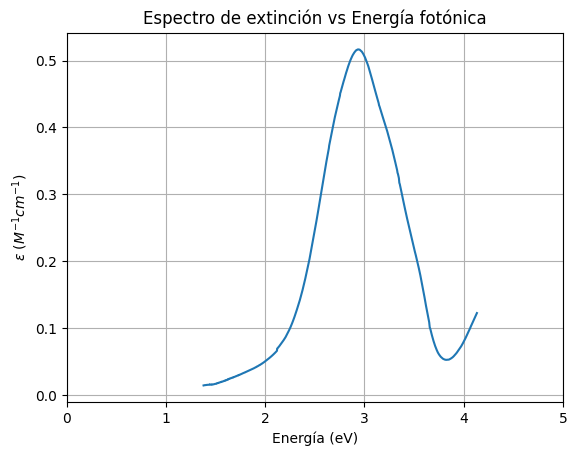

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

L=1
C=8.14560595107596e-3
HC=1240

data = pd.read_csv("sara 10 12.csv", names=['WL(nm)', 'Abs', 'T%'])[11:]
data['Ext'] = (data['Abs'].astype(float))
data['Ene'] = HC/(data['WL(nm)'].astype(float))

fig, ax = plt.subplots()
plt.title('Espectro de extinción vs Energía fotónica')
plt.xlabel('Energía (eV)')
plt.ylabel('$\epsilon$ ($M^{-1}$$cm^{-1})$')
plt.grid()
ax.set_xlim(0, 5)
#ax.set_ylim(0, 65)
plt.plot(data['Ene'], data['Ext'])
plt.show()


## Radio de nanopartícula
Según lo reportado por A. Wei, el tamaño de párticula afecta la respuesta plasmónica. Yguerabide ha cálculado la absorción teorica de Mie y propiedades de dispersión para distintos tamaños de particula de plata disueltas en agua. 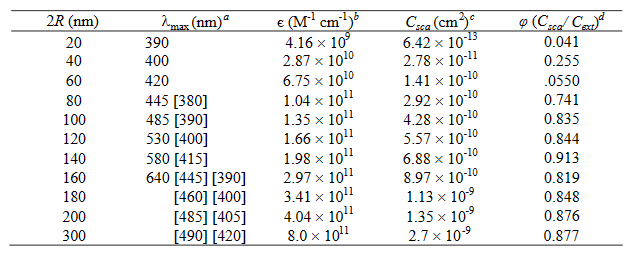

Para observar esto, se necesita una gráfica de coeficiente de extinción (en $cm^{-1}$) vs longitud de onda (en nm).

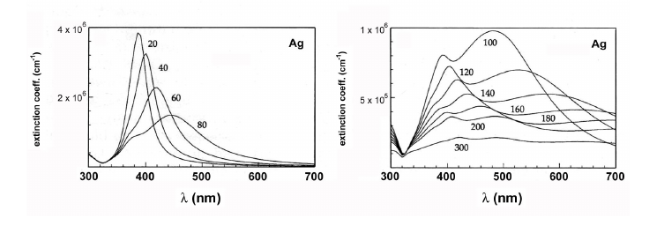

Para ello, también, se necesita la absorbancia (A) , la distancia que viaja la luz a través de la solución (L) y la concentración molar (c) de la especie absorbente por unidad de volumen:

$\epsilon = \frac{A}{Lc}$

En nuestro caso:<br>
A: Se obtiene de la data para cada valor de $\lambda$ <br>
L: 1cm <br>
c: Se usaron 0,01868g de AgNO3 en una solución que finalmente tuvo 13,5ml. De esos 0,01868g, el 63,5% corresponde a Ag, por lo que hay 1,0997x10$^{-4}$ moles de Ag. Finalmente, c es de 8,1456x10$^{-6}$ mol/ml = 8,1456x10$^{-3}$ M


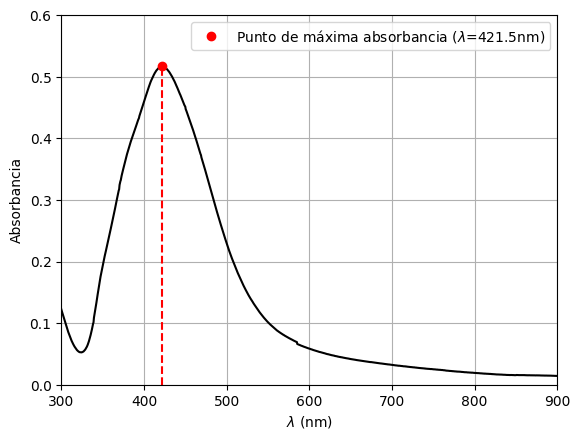

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

L=1
C=8.14560595107596e-3

data = pd.read_csv("sara 10 12.csv", names=['WL(nm)', 'Abs', 'T%'])[11:]
data['Abs'] = (data['Abs'].astype(float))
data['WL(nm)'] = data['WL(nm)'].astype(float)

# Encontrar valor máximo de coeficiente de extinción
max = data['Abs'].idxmax()

fig, ax = plt.subplots()
#plt.title('Absorbancia vs Longitud de onda')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Absorbancia')
plt.grid()
ax.set_xlim(300, 900)
ax.set_ylim(0, 0.6)
ax.plot(data['WL(nm)'], data['Abs'], color="black")
ax.plot(data['WL(nm)'][max], data['Abs'][max], 'ro',
        label=f"Punto de máxima absorbancia ($\lambda$={data['WL(nm)'][max]}nm)")
ax.axvline(x=data['WL(nm)'][max], ymax=data['Abs'][max]/0.6, linestyle='--',
           color='r')
plt.legend()
plt.show()


## Conclusion
El punto se encuentra 421,5nm de longitud de onda, lo que implica que el tamaño de las nanoparticulas era, de acuerdo a la tabla, de 2R=60nm, es decir: <br>
Radio = 30 nm <br>
Diametro = 60 nm<br>
Volumen = 3600 nm$^3$

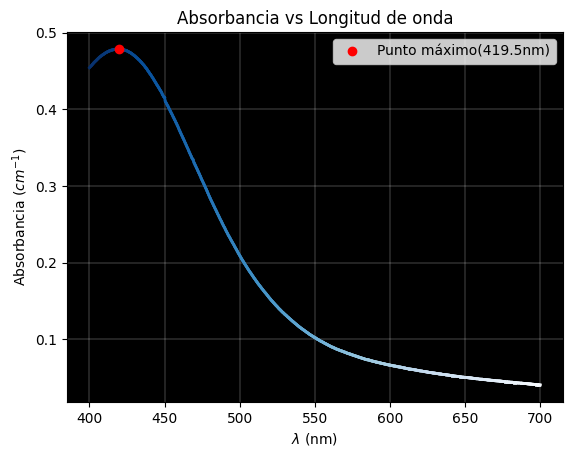

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

L=1
C=8.14560595107596e-3

# data = pd.read_csv("sara 10 12.csv", names=['WL(nm)', 'Abs', 'T%'])[11:]
data = pd.read_csv("Duvan 8 10.csv", names=['WL(nm)', 'Abs', 'T%'])[11:]
data['Abs'] = (data['Abs'].astype(float))
data['WL(nm)'] = data['WL(nm)'].astype(float)

# Filtrar los datos para el rango de luz visible
data_visible = data[(data['WL(nm)'] >= 400) & (data['WL(nm)'] <= 700)]

# Encontrar valor máximo de coeficiente de extinción en el rango de luz visible
max_visible = data_visible['Abs'].idxmax()

# Convertir longitud de onda a RGB
def wavelength_to_rgb(wavelength):
    w = int(wavelength)

    # Rango de longitud de onda para el espectro visible
    if w >= 380 and w < 440:
        R = -(w - 440.) / (440. - 350.)
        G = 0.0
        B = 1.0
    elif w >= 440 and w < 490:
        R = 0.0
        G = (w - 440.) / (490. - 440.)
        B = 1.0
    elif w >= 490 and w < 510:
        R = 0.0
        G = 1.0
        B = -(w - 510.) / (510. - 490.)
    elif w >= 510 and w < 580:
        R = (w - 510.) / (580. - 510.)
        G = 1.0
        B = 0.0
    elif w >= 580 and w < 645:
        R = 1.0
        G = -(w - 645.) / (645. - 580.)
        B = 0.0
    elif w >= 645 and w <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0

    # Intensidad correcta para longitudes de onda visibles
    if w >= 380 and w < 420:
        SSS = 0.3 + 0.7*(w - 350) / (420 - 350)
    elif w >= 420 and w <= 700:
        SSS = 1.0
    elif w > 700 and w <= 780:
        SSS = 0.3 + 0.7*(780 - w) / (780 - 700)
    else:
        SSS = 0.0
    SSS *= 255

    return [int(SSS*R), int(SSS*G), int(SSS*B)]

peak_wavelength = data_visible['WL(nm)'][max_visible]
rgb = wavelength_to_rgb(peak_wavelength)
hex_color = mcolors.rgb2hex([1.0*rgb[0]/255, 1.0*rgb[1]/255, 1.0*rgb[2]/255])

fig, ax = plt.subplots()
plt.title('Absorbancia vs Longitud de onda')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Absorbancia ($cm^{-1})$')
plt.grid(color='white', linestyle='-', linewidth=0.2)
ax.set_facecolor('black')

# Crear un mapa de colores que se intensifica a azul
cmap = plt.get_cmap('Blues_r')
norm = plt.Normalize(vmin=data_visible['WL(nm)'].min(), vmax=data_visible['WL(nm)'].max())
colors = cmap(norm(data_visible['WL(nm)']))

# Dibujar la línea con colores cambiantes y grosor aumentado
for i in range(len(data_visible['WL(nm)'])-1):
    plt.plot(data_visible['WL(nm)'].iloc[i:i+2], data_visible['Abs'].iloc[i:i+2], color=colors[i], linewidth=2)

ax.plot(data_visible['WL(nm)'][max_visible], data_visible['Abs'][max_visible], 'ro',
        label=f"Punto máximo({data_visible['WL(nm)'][max_visible]}nm)")
plt.legend()
plt.show()


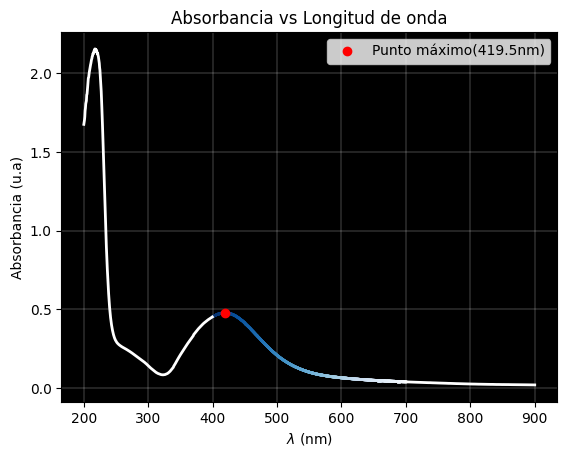

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

L=1
C=8.14560595107596e-3

# data = pd.read_csv("sara 10 12.csv", names=['WL(nm)', 'Abs', 'T%'])[11:]
data = pd.read_csv("Duvan 8 10.csv", names=['WL(nm)', 'Abs', 'T%'])[11:]
data['Abs'] = (data['Abs'].astype(float))
data['WL(nm)'] = data['WL(nm)'].astype(float)

# Filtrar los datos para el rango de luz visible
data_visible = data[(data['WL(nm)'] >= 400) & (data['WL(nm)'] <= 700)]

# Encontrar valor máximo de coeficiente de extinción en el rango de luz visible
max_visible = data_visible['Abs'].idxmax()

# Convertir longitud de onda a RGB
def wavelength_to_rgb(wavelength):
    w = int(wavelength)

    # Rango de longitud de onda para el espectro visible
    if w >= 380 and w < 440:
        R = -(w - 440.) / (440. - 350.)
        G = 0.0
        B = 1.0
    elif w >= 440 and w < 490:
        R = 0.0
        G = (w - 440.) / (490. - 440.)
        B = 1.0
    elif w >= 490 and w < 510:
        R = 0.0
        G = 1.0
        B = -(w - 510.) / (510. - 490.)
    elif w >= 510 and w < 580:
        R = (w - 510.) / (580. - 510.)
        G = 1.0
        B = 0.0
    elif w >= 580 and w < 645:
        R = 1.0
        G = -(w - 645.) / (645. - 580.)
        B = 0.0
    elif w >= 645 and w <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0

    # Intensidad correcta para longitudes de onda visibles
    if w >= 380 and w < 420:
        SSS = 0.3 + 0.7*(w - 350) / (420 - 350)
    elif w >= 420 and w <= 700:
        SSS = 1.0
    elif w > 700 and w <= 780:
        SSS = 0.3 + 0.7*(780 - w) / (780 - 700)
    else:
        SSS = 0.0
    SSS *= 255

    return [int(SSS*R), int(SSS*G), int(SSS*B)]

peak_wavelength = data_visible['WL(nm)'][max_visible]
rgb = wavelength_to_rgb(peak_wavelength)
hex_color = mcolors.rgb2hex([1.0*rgb[0]/255, 1.0*rgb[1]/255, 1.0*rgb[2]/255])

fig, ax = plt.subplots()
plt.title('Absorbancia vs Longitud de onda')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Absorbancia (u.a)')
plt.grid(color='white', linestyle='-', linewidth=0.2)
ax.set_facecolor('black')

# Crear un mapa de colores que se intensifica a azul
cmap = plt.get_cmap('Blues_r')
norm = plt.Normalize(vmin=data_visible['WL(nm)'].min(), vmax=data_visible['WL(nm)'].max())
colors = cmap(norm(data_visible['WL(nm)']))

# Dibujar la línea con colores cambiantes y grosor aumentado en el rango visible
for i in range(len(data_visible['WL(nm)'])-1):
    plt.plot(data_visible['WL(nm)'].iloc[i:i+2], data_visible['Abs'].iloc[i:i+2], color=colors[i], linewidth=2)

# Dibujar la línea para el rango no visible
data_nonvisible1 = data[data['WL(nm)'] < 400]
data_nonvisible2 = data[data['WL(nm)'] > 700]
plt.plot(data_nonvisible1['WL(nm)'], data_nonvisible1['Abs'], color='white', linewidth=2)
plt.plot(data_nonvisible2['WL(nm)'], data_nonvisible2['Abs'], color='white', linewidth=2)

ax.plot(data_visible['WL(nm)'][max_visible], data_visible['Abs'][max_visible], 'ro',
        label=f"Punto máximo({data_visible['WL(nm)'][max_visible]}nm)")
plt.legend()
plt.show()
